## <center> Logistic Regression on Iris Dataset 

#### Importing Necessary Libraries

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Loading Dataset from csv file

In [20]:
df = pd.read_csv("Iris.csv")
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
80,81,5.5,2.4,3.8,1.1,versicolor
36,37,5.5,3.5,1.3,0.2,setosa
129,130,7.2,3.0,5.8,1.6,virginica
38,39,4.4,3.0,1.3,0.2,setosa
99,100,5.7,2.8,4.1,1.3,versicolor


#### EDA

In [21]:
df.drop(columns='Id', inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
df["Species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

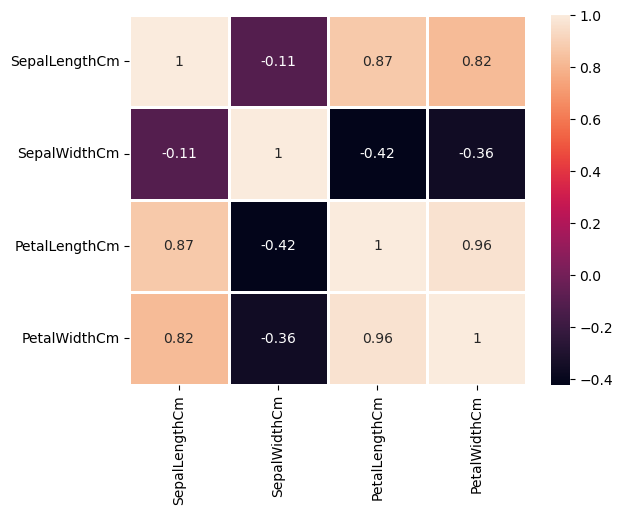

In [25]:
sns.heatmap(df.corr(), linecolor = 'white', linewidths = 1, annot = True )

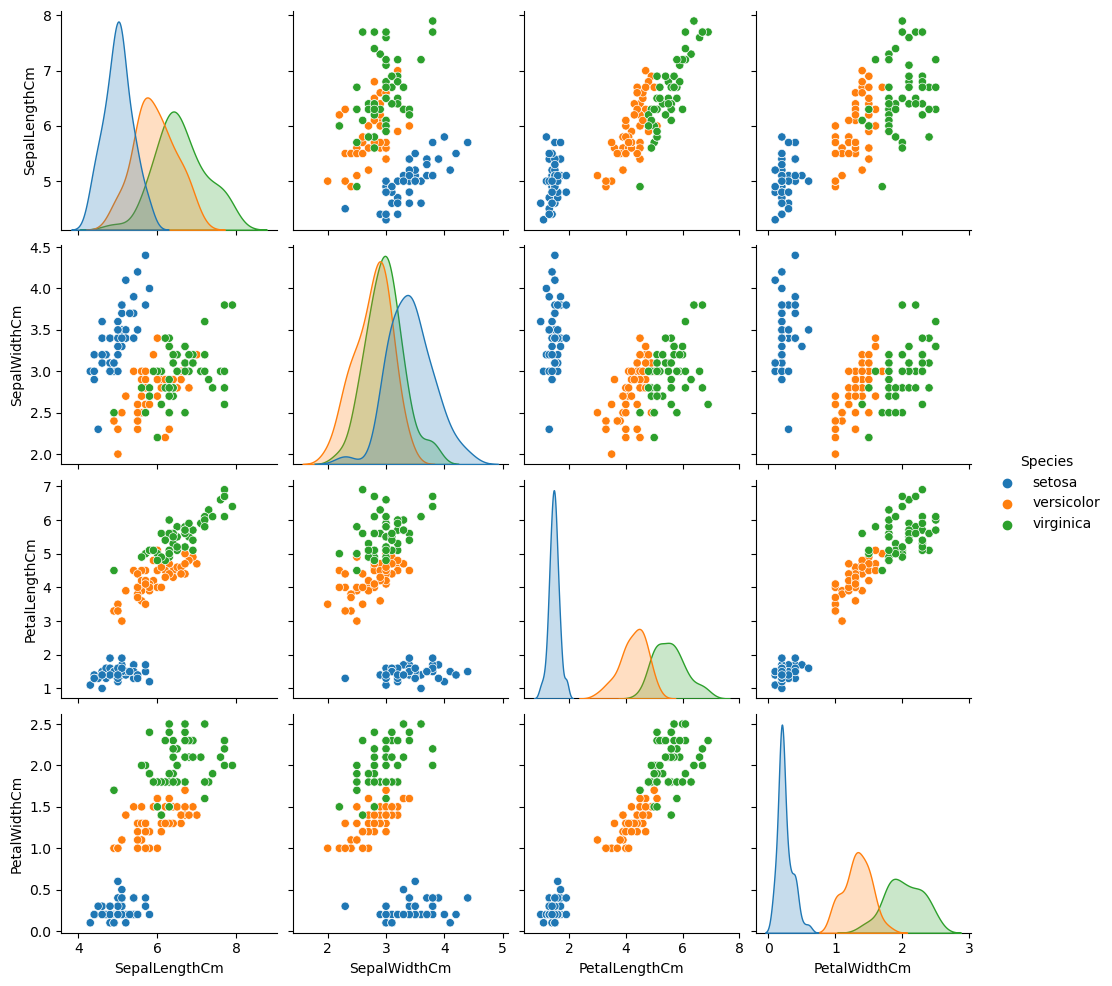

In [26]:
sns.pairplot(df,hue="Species")

#### Importing ML Libraries

In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#### Encoding target column

In [28]:
lbl = LabelEncoder()
df['Species'] = lbl.fit_transform(df['Species'])

#### Dividing data into dependent and independent features

In [29]:
X = df.iloc[:, :4].values
y = df.iloc[:, -1].values

#### Dividing data into training and testing set

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


# Logistic Regression

In [55]:
reg = LogisticRegression(max_iter=120)
reg.fit(X_train, y_train)

LogisticRegression(max_iter=120)

In [56]:
y_pred = reg.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [57]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [58]:
# Creating Confusion matrix
confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [59]:
# Checking accuracy
acc = accuracy_score(y_test, y_pred)
print(acc*100, "%")

97.36842105263158 %


In [61]:
# check precision,recall,f1-score using classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [62]:
d = np.array([[5.2,3,0.8,0.6], [7.5,5.6,4,3.5]])
prediction = reg.predict(d)
prediction

array([0, 2])